<a href="https://colab.research.google.com/github/daa103/DAA_ESAA/blob/main/%EA%B0%95%EC%84%A4%EB%9F%89_data%EC%A0%84%EC%B2%98%EB%A6%AC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###삼성화재X포스텍 데이터기반 리스크관리 경진대회

-  자동차보험: 강설량에 따른 사고율 예측 모델
- 주요 지역별 강설량에 따른 사고율 예측 정확성 제고 필요
- 인공지능 모형을 활용한 지역별 강설 데이터 기반 사고율 추정 모델 구축


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

# os 관리를 위한 라이브러리
import os
import gc
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

#한글 깨짐 현상을 방지하기 위한 글꼴 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,615 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120895 files and dire

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**0.데이터 불러오기**
- 삼성화재 사고량 데이터

In [4]:
data1=pd.read_excel('/content/drive/MyDrive/최근/강설량data/(자동차보험) 강설량에 따른 사고율 예측 모델_1.xlsx')
data2=pd.read_excel('/content/drive/MyDrive/최근/강설량data/(자동차보험) 강설량에 따른 사고율 예측 모델_2.xlsx')
data3=pd.read_excel('/content/drive/MyDrive/최근/강설량data/(자동차보험) 강설량에 따른 사고율 예측 모델_3.xlsx')

In [5]:
data_total=pd.concat([data1,data2,data3])

In [6]:
print(data_total.head())
print(data_total.tail())

     사고발생일자  사고발생년도  사고발생월도 지역(시도) 지역(구군) 공휴일구분 주말구분  요일  주차  사고건수
0  20170101    2017       1     전남    무안군     Y    Y   7   1    22
1  20170101    2017       1     전남    장성군     Y    Y   7   1     3
2  20170101    2017       1     인천     중구     Y    Y   7   1    19
3  20170101    2017       1     경북    경주시     Y    Y   7   1    35
4  20170101    2017       1     경남    통영시     Y    Y   7   1    14
          사고발생일자  사고발생년도  사고발생월도 지역(시도) 지역(구군) 공휴일구분 주말구분  요일  주차  사고건수
121005  20230630    2023       6     인천     동구     N    N   5   5     6
121006  20230630    2023       6     부산     남구     N    N   5   5     8
121007  20230630    2023       6     대구     동구     N    N   5   5    13
121008  20230630    2023       6     전남    담양군     N    N   5   5     5
121009  20230630    2023       6     충남    서천군     N    N   5   5     3


In [7]:
data_total['사고발생일자'] = data_total['사고발생일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

In [8]:
print(data_total.head())
print(data_total.tail())
print(len(data_total))

      사고발생일자  사고발생년도  사고발생월도 지역(시도) 지역(구군) 공휴일구분 주말구분  요일  주차  사고건수
0 2017-01-01    2017       1     전남    무안군     Y    Y   7   1    22
1 2017-01-01    2017       1     전남    장성군     Y    Y   7   1     3
2 2017-01-01    2017       1     인천     중구     Y    Y   7   1    19
3 2017-01-01    2017       1     경북    경주시     Y    Y   7   1    35
4 2017-01-01    2017       1     경남    통영시     Y    Y   7   1    14
           사고발생일자  사고발생년도  사고발생월도 지역(시도) 지역(구군) 공휴일구분 주말구분  요일  주차  사고건수
121005 2023-06-30    2023       6     인천     동구     N    N   5   5     6
121006 2023-06-30    2023       6     부산     남구     N    N   5   5     8
121007 2023-06-30    2023       6     대구     동구     N    N   5   5    13
121008 2023-06-30    2023       6     전남    담양군     N    N   5   5     5
121009 2023-06-30    2023       6     충남    서천군     N    N   5   5     3
526188


In [9]:
data_total.to_excel("자동차보험_데이터총함파일.xlsx",index=False)

- 블랙아이스 데이터


In [10]:
bice_1=pd.read_excel('/content/drive/MyDrive/최근/강설량data/서울부산대구인천광주대전울산경기세종 일교차습도평균지면온도.xlsx')
bice_2=pd.read_excel('/content/drive/MyDrive/최근/강설량data/강원충북충남경북경남전북전남제주 일교차습도평균지면온도.xlsx')

In [11]:
bice_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21044 entries, 0 to 21043
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   사고발생일자     21044 non-null  datetime64[ns]
 1   지역(시도)     21044 non-null  object        
 2   평균최저기온(℃)  21040 non-null  float64       
 3   일교차        21024 non-null  float64       
 4   평균습도(%rh)  21036 non-null  float64       
 5   평균지면온도     19705 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 986.6+ KB


In [12]:
bice_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19488 entries, 0 to 19487
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   사고발생일자     19488 non-null  datetime64[ns]
 1   지역(시도)     19488 non-null  object        
 2   평균최저기온(℃)  19488 non-null  float64       
 3   일교차        19488 non-null  float64       
 4   평균습도(%rh)  19488 non-null  float64       
 5   평균지면온도     18976 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 913.6+ KB


In [13]:
bice_1.head()

,사고발생일자,지역(시도),평균최저기온(℃),일교차,평균습도(%rh),평균지면온도
0,2017-01-01,서울,-1.6,8.5,75.9,0.9
1,2017-01-02,서울,1.8,7.4,77.8,4.8
2,2017-01-03,서울,-2.3,10.0,61.8,1.5
3,2017-01-04,서울,1.0,7.9,55.0,3.0
4,2017-01-05,서울,-0.1,7.4,52.3,2.4


In [14]:
bice_2.head()

,사고발생일자,지역(시도),평균최저기온(℃),일교차,평균습도(%rh),평균지면온도
0,2017-01-01,강원,-1.066667,7.566667,69.666667,0.342857
1,2017-01-02,강원,1.433333,7.500000,70.333333,1.785714
2,2017-01-03,강원,-1.800000,10.400000,59.333333,0.957143
3,2017-01-04,강원,-1.066667,10.433333,61.666667,1.292857
4,2017-01-05,강원,-1.933333,8.033333,75.666667,0.614286


In [15]:
bice=pd.concat([bice_1,bice_2])

In [16]:
print(bice.head())
print(bice.tail())

      사고발생일자 지역(시도)  평균최저기온(℃)   일교차  평균습도(%rh)  평균지면온도
0 2017-01-01     서울       -1.6   8.5       75.9     0.9
1 2017-01-02     서울        1.8   7.4       77.8     4.8
2 2017-01-03     서울       -2.3  10.0       61.8     1.5
3 2017-01-04     서울        1.0   7.9       55.0     3.0
4 2017-01-05     서울       -0.1   7.4       52.3     2.4
          사고발생일자 지역(시도)  평균최저기온(℃)  일교차  평균습도(%rh)  평균지면온도
19483 2023-08-29     제주       25.4  5.7       88.0     NaN
19484 2023-08-30     제주       22.7  4.2       90.0     NaN
19485 2023-08-31     제주       22.4  5.1       78.0     NaN
19486 2023-09-01     제주       23.5  4.2       86.0     NaN
19487 2023-09-02     제주       24.1  6.4       81.0     NaN


In [17]:
bice.to_excel("블랙아이스_총데이터.xlsx",index=False)

- 강설량 데이터

In [18]:
snow=pd.read_excel('/content/drive/MyDrive/최근/강설량data/강설량통합데이터.xlsx')

In [19]:
print(snow.head())
print(snow.tail())

     사고발생일자 지역(시도)  일 최심신적설(cm)
0  20170105     경북          0.0
1  20170109     경북          0.0
2  20170110     수원          0.0
3  20170110     경북          0.0
4  20170110     인천          0.0
        사고발생일자 지역(시도)  일 최심신적설(cm)
2720  20230301     경북          0.0
2721  20230302     경북          3.0
2722  20230312     강원          0.8
2723  20230312     충북          0.0
2724  20230313     경북          2.4


In [20]:
snow['사고발생일자'] = snow['사고발생일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

In [21]:
print(snow.head())
print(snow.tail())

      사고발생일자 지역(시도)  일 최심신적설(cm)
0 2017-01-05     경북          0.0
1 2017-01-09     경북          0.0
2 2017-01-10     수원          0.0
3 2017-01-10     경북          0.0
4 2017-01-10     인천          0.0
         사고발생일자 지역(시도)  일 최심신적설(cm)
2720 2023-03-01     경북          0.0
2721 2023-03-02     경북          3.0
2722 2023-03-12     강원          0.8
2723 2023-03-12     충북          0.0
2724 2023-03-13     경북          2.4


- 도로 데이터

In [22]:
road=pd.read_excel('/content/drive/MyDrive/최근/강설량data/도로종합_0902.xlsx')

In [23]:
print(road.head())
print(road.tail())

     연도 지역(시도) 지역(구군)  연장(km)  염화칼슘사용량  소금사용량  수용액용소금사용량
0  2022     강원     홍천   12.00      360   3948          0
1  2022     강원     원주   11.00      301   2609          0
2  2022     충북     제천   23.00      526   5146          0
3  2022     울산     울산    4.00       12    152          0
4  2022     강원     춘천   12.35      658   4439          0
       연도 지역(시도) 지역(구군)  연장(km)  염화칼슘사용량  소금사용량  수용액용소금사용량
320  2017     경남     창원     3.0       45    232         50
321  2017     경기    시흥      2.0      546   3886          0
322  2017     경북     영천    10.3      205   1133          0
323  2017     강원     강릉     7.0      459   2859          0
324  2017     경남     경주     3.8       54    169          0


In [24]:
road.rename(columns={'연도':'사고발생년도'},inplace=True)

In [25]:
road.head()

,사고발생년도,지역(시도),지역(구군),연장(km),염화칼슘사용량,소금사용량,수용액용소금사용량
0,2022,강원,홍천,12.00,360,3948,0
1,2022,강원,원주,11.00,301,2609,0
2,2022,충북,제천,23.00,526,5146,0
3,2022,울산,울산,4.00,12,152,0
4,2022,강원,춘천,12.35,658,4439,0


In [26]:
road=road.drop(['염화칼슘사용량','소금사용량','수용액용소금사용량','지역(구군)'],axis=1)

In [27]:
road.head()

,사고발생년도,지역(시도),연장(km)
0,2022,강원,12.00
1,2022,강원,11.00
2,2022,충북,23.00
3,2022,울산,4.00
4,2022,강원,12.35


### - 전체 데이터 merge
- data_total: 기준데이터
- bice: 블랙아이스 데이터
- snow: 강설량 데이터
- road: 도로연장 데이터

In [28]:
df1=pd.merge(data_total,bice,on=['사고발생일자','지역(시도)'],how='left')

In [29]:
print(df1.head())
print(df1.tail())

      사고발생일자  사고발생년도  사고발생월도 지역(시도) 지역(구군) 공휴일구분 주말구분  요일  주차  사고건수  \
0 2017-01-01    2017       1     전남    무안군     Y    Y   7   1    22   
1 2017-01-01    2017       1     전남    장성군     Y    Y   7   1     3   
2 2017-01-01    2017       1     인천     중구     Y    Y   7   1    19   
3 2017-01-01    2017       1     경북    경주시     Y    Y   7   1    35   
4 2017-01-01    2017       1     경남    통영시     Y    Y   7   1    14   

   평균최저기온(℃)   일교차  평균습도(%rh)    평균지면온도  
0       -0.3  11.6       81.0  3.946154  
1       -0.3  11.6       81.0  3.946154  
2        1.3   7.2       78.6  1.200000  
3       -1.9  11.9       69.0  1.657143  
4       -1.9  13.3       72.0  2.385714  
           사고발생일자  사고발생년도  사고발생월도 지역(시도) 지역(구군) 공휴일구분 주말구분  요일  주차  사고건수  \
526183 2023-06-30    2023       6     인천     동구     N    N   5   5     6   
526184 2023-06-30    2023       6     부산     남구     N    N   5   5     8   
526185 2023-06-30    2023       6     대구     동구     N    N   5   5    13   
526186 2023-06-30

In [30]:
#합쳐진 데이터에 snow데이터 합치기
df2= pd.merge(df1,snow, on=['사고발생일자','지역(시도)'],how='left')

In [31]:
df2

,사고발생일자,사고발생년도,사고발생월도,지역(시도),지역(구군),공휴일구분,주말구분,요일,주차,사고건수,평균최저기온(℃),일교차,평균습도(%rh),평균지면온도,일 최심신적설(cm)
0,2017-01-01,2017,1,전남,무안군,Y,Y,7,1,22,-0.3,11.6,81.0,3.946154,NaN
1,2017-01-01,2017,1,전남,장성군,Y,Y,7,1,3,-0.3,11.6,81.0,3.946154,NaN
2,2017-01-01,2017,1,인천,중구,Y,Y,7,1,19,1.3,7.2,78.6,1.200000,NaN
3,2017-01-01,2017,1,경북,경주시,Y,Y,7,1,35,-1.9,11.9,69.0,1.657143,NaN
4,2017-01-01,2017,1,경남,통영시,Y,Y,7,1,14,-1.9,13.3,72.0,2.385714,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531082,2023-06-30,2023,6,인천,동구,N,N,5,5,6,22.1,4.7,90.4,27.366667,NaN
531083,2023-06-30,2023,6,부산,남구,N,N,5,5,8,21.3,3.9,87.0,24.100000,NaN
531084,2023-06-30,2023,6,대구,동구,N,N,5,5,13,22.3,3.4,92.4,25.400000,NaN
531085,2023-06-30,2023,6,전남,담양군,N,N,5,5,5,22.4,3.2,96.0,23.980000,NaN


In [32]:
#합쳐진 데이터에 road데이터 합치기
df3= pd.merge(df2,road, on=['사고발생년도','지역(시도)'],how='left')

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142717 entries, 0 to 2142716
Data columns (total 16 columns):
 #   Column       Dtype         
---  ------       -----         
 0   사고발생일자       datetime64[ns]
 1   사고발생년도       int64         
 2   사고발생월도       int64         
 3   지역(시도)       object        
 4   지역(구군)       object        
 5   공휴일구분        object        
 6   주말구분         object        
 7   요일           int64         
 8   주차           int64         
 9   사고건수         int64         
 10  평균최저기온(℃)    float64       
 11  일교차          float64       
 12  평균습도(%rh)    float64       
 13  평균지면온도       float64       
 14  일 최심신적설(cm)  float64       
 15  연장(km)       float64       
dtypes: datetime64[ns](1), float64(6), int64(5), object(4)
memory usage: 277.9+ MB


###**1. 데이터전처리**
📌 Data Description
- 사고발생일자: 2017~2023.06 데이터
- 사고발생년도: 년도 추출
- 사고발생월도
- 지역(시도): 특별시, 광역시 구분
- 지역(구군)
- 공휴일구분: 엔코딩필요
- 주말구분: 엔코딩필요
- 요일: 1월요일, 2화요일 순서로 구분, 금요일만 연관성 있어보이고 주말구분이 되어있어 필요한 칼럼인지 확인필요
- 주차: 특별한 연관성이 없어보이는 칼럼
- 사고건수
- 평균최저기온: 블랙아이스 연관데이터
- 일교차: 블랙아이스 연관데이터
- 평균습도: 블랙아이스 연관데이터
- 평균지면온도: 블랙아이스 연관데이터
- 일 최심신적설: 강설량데이터로, 데이터가 없는 NaN부분은 강설량이 없는 것, 0은 강설이 내렸지만 cm로 데이터가 없는 것

In [51]:
train= df3
test= df3.drop(['사고건수'], axis=1)

In [52]:
### 데이터 형태 확인

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142717 entries, 0 to 2142716
Data columns (total 16 columns):
 #   Column       Dtype         
---  ------       -----         
 0   사고발생일자       datetime64[ns]
 1   사고발생년도       int64         
 2   사고발생월도       datetime64[ns]
 3   지역(시도)       object        
 4   지역(구군)       object        
 5   공휴일구분        object        
 6   주말구분         object        
 7   요일           int64         
 8   주차           int64         
 9   사고건수         int64         
 10  평균최저기온(℃)    float64       
 11  일교차          float64       
 12  평균습도(%rh)    float64       
 13  평균지면온도       float64       
 14  일 최심신적설(cm)  float64       
 15  연장(km)       float64       
dtypes: datetime64[ns](2), float64(6), int64(4), object(4)
memory usage: 277.9+ MB


In [53]:
train.describe()

,사고발생년도,요일,주차,사고건수,평균최저기온(℃),일교차,평균습도(%rh),평균지면온도,일 최심신적설(cm),연장(km)
count,2.142717e+06,2.142717e+06,2.142717e+06,2.142717e+06,2.141794e+06,2.139846e+06,2.141792e+06,2.141063e+06,166366.000000,2.060729e+06
mean,2.019567e+03,3.993587e+00,3.095516e+00,2.143719e+01,8.127401e+00,8.977319e+00,6.795103e+01,1.508413e+01,2.023104,6.183864e+00
std,1.758358e+00,1.998313e+00,1.311496e+00,2.856121e+01,1.038485e+01,4.439878e+00,1.489822e+01,1.090685e+01,5.855823,4.885756e+00
min,2.017000e+03,1.000000e+00,1.000000e+00,1.000000e+00,-2.030000e+01,0.000000e+00,1.680000e+01,-9.300000e+00,0.000000,6.000000e-01
25%,2.018000e+03,2.000000e+00,2.000000e+00,4.000000e+00,-4.000000e-01,6.066667e+00,5.733333e+01,4.950000e+00,0.000000,2.440000e+00
50%,2.020000e+03,4.000000e+00,3.000000e+00,1.000000e+01,8.000000e+00,9.300000e+00,6.954000e+01,1.540000e+01,0.000000,4.540000e+00
75%,2.021000e+03,6.000000e+00,4.000000e+00,2.700000e+01,1.730000e+01,1.210000e+01,7.900000e+01,2.461667e+01,1.600000,8.000000e+00
max,2.023000e+03,7.000000e+00,6.000000e+00,1.519000e+03,3.030000e+01,2.280000e+01,1.000000e+02,4.270000e+01,79.000000,2.300000e+01


###**1-1데이터 시각화**


In [41]:
!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv

!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [42]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.p

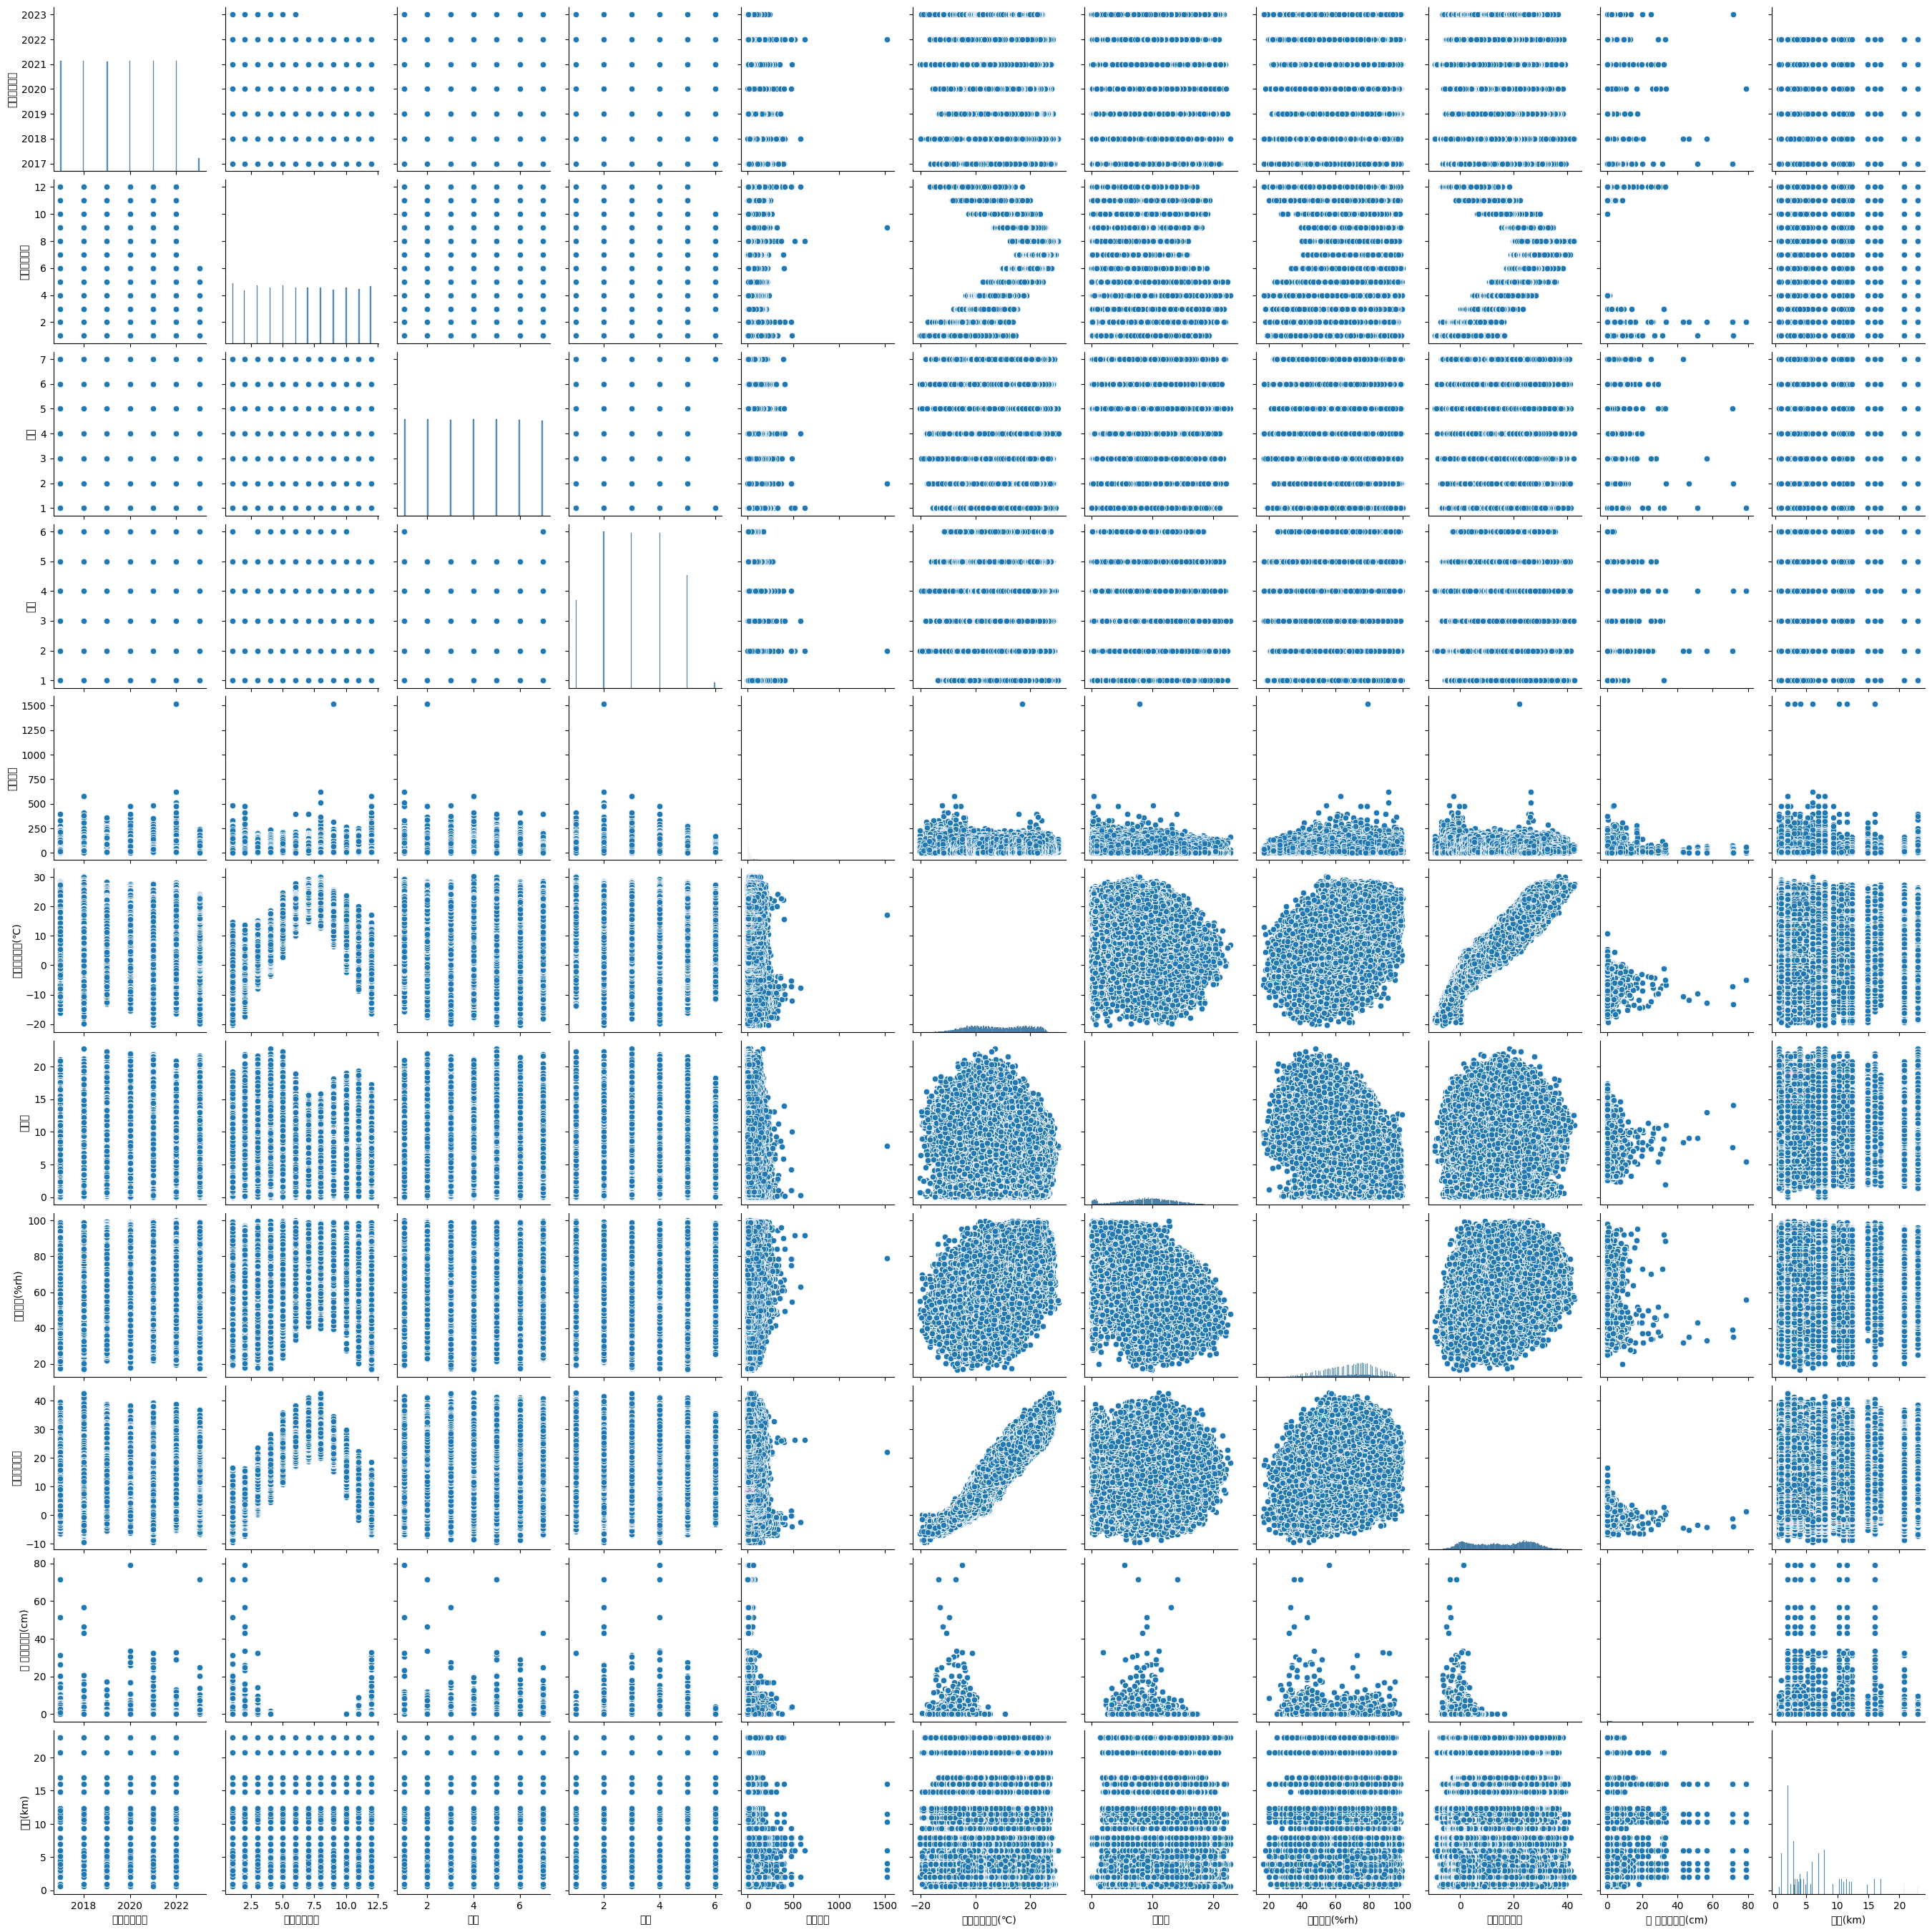

In [39]:
sns.pairplot(data = train)
plt.show()

<ipython-input-43-58cdac387cd8>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()
<ipython-input-43-58cdac387cd8>:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)


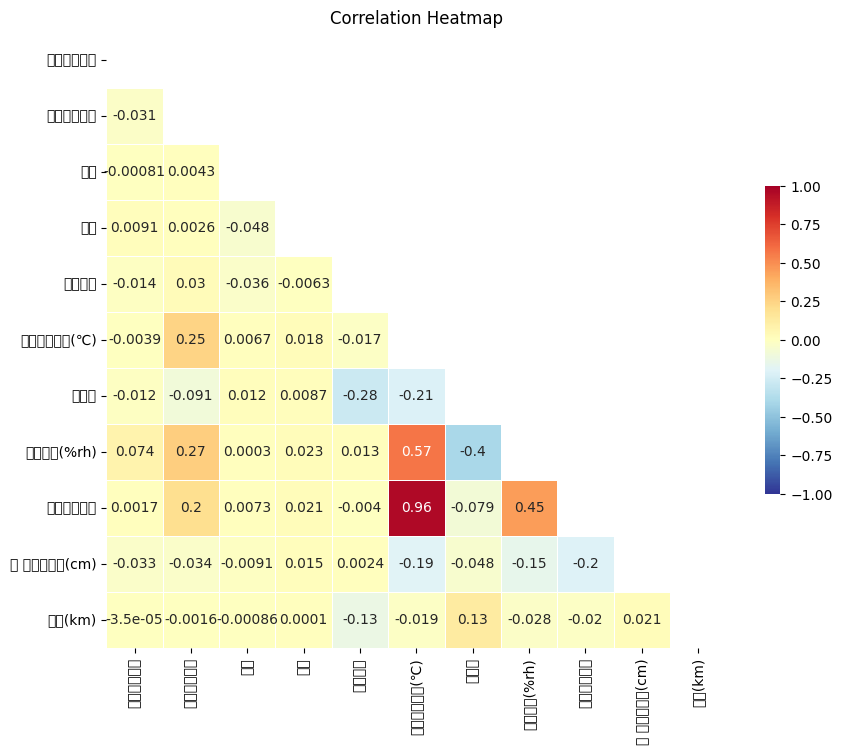

In [43]:
### 상관계수 시각화
# 영화 관객수와 관련 있는 변수 파악

corr = train.corr()

# 그림 사이즈 지정
fig, ax = plt.subplots(figsize = (10,8))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# 하삼각행렬만 시각화(밑에만)
sns.heatmap(corr,
            cmap = 'RdYlBu_r',
            annot = True,   # 실제 값을 표시
            mask = mask,      # 표시하지 않을 마스크 부분을 지정
            linewidths=.5,  # 경계면을 실선으로 구분하기
            cbar_kws={"shrink": .5}, # 컬러바 크기 절반으로 줄이기
            vmin = -1, vmax = 1   # 컬러바 범위: -1 ~ 1(상관계수의 범위)
           )

plt.title('Correlation Heatmap')
plt.show()

-> heatmap을 통해 사고건수가 다른 변수들과 상관관계가 크지 않다는 사실을 발견...

In [44]:
train['사고발생일자']

0         2017-01-01
1         2017-01-01
2         2017-01-01
3         2017-01-01
4         2017-01-01
             ...    
2142712   2023-06-30
2142713   2023-06-30
2142714   2023-06-30
2142715   2023-06-30
2142716   2023-06-30
Name: 사고발생일자, Length: 2142717, dtype: datetime64[ns]

In [54]:
train['사고발생월도'] = train['사고발생일자'].dt.strftime('%m')
train.head()

,사고발생일자,사고발생년도,사고발생월도,지역(시도),지역(구군),공휴일구분,주말구분,요일,주차,사고건수,평균최저기온(℃),일교차,평균습도(%rh),평균지면온도,일 최심신적설(cm),연장(km)
0,2017-01-01,2017,01,전남,무안군,Y,Y,7,1,22,-0.3,11.6,81.0,3.946154,NaN,3.00
1,2017-01-01,2017,01,전남,무안군,Y,Y,7,1,22,-0.3,11.6,81.0,3.946154,NaN,17.00
2,2017-01-01,2017,01,전남,무안군,Y,Y,7,1,22,-0.3,11.6,81.0,3.946154,NaN,2.00
3,2017-01-01,2017,01,전남,무안군,Y,Y,7,1,22,-0.3,11.6,81.0,3.946154,NaN,10.65
4,2017-01-01,2017,01,전남,무안군,Y,Y,7,1,22,-0.3,11.6,81.0,3.946154,NaN,3.54


In [55]:
filtered_train = train[train['사고발생월도'].isin(['01', '12'])]

print(filtered_train)

            사고발생일자  사고발생년도 사고발생월도 지역(시도) 지역(구군) 공휴일구분 주말구분  요일  주차  사고건수  \
0       2017-01-01    2017     01     전남    무안군     Y    Y   7   1    22   
1       2017-01-01    2017     01     전남    무안군     Y    Y   7   1    22   
2       2017-01-01    2017     01     전남    무안군     Y    Y   7   1    22   
3       2017-01-01    2017     01     전남    무안군     Y    Y   7   1    22   
4       2017-01-01    2017     01     전남    무안군     Y    Y   7   1    22   
...            ...     ...    ...    ...    ...   ...  ...  ..  ..   ...   
2109437 2023-01-31    2023     01     부산    수영구     N    N   2   5    17   
2109438 2023-01-31    2023     01     경북    문경시     N    N   2   5     7   
2109439 2023-01-31    2023     01     경북    의성군     N    N   2   5     2   
2109440 2023-01-31    2023     01     경남    진주시     N    N   2   5    31   
2109441 2023-01-31    2023     01     경북    영덕군     N    N   2   5     5   

         평균최저기온(℃)   일교차  평균습도(%rh)    평균지면온도  일 최심신적설(cm)  연장(km)  
0             -0.3

In [56]:
print(train)

            사고발생일자  사고발생년도 사고발생월도 지역(시도) 지역(구군) 공휴일구분 주말구분  요일  주차  사고건수  \
0       2017-01-01    2017     01     전남    무안군     Y    Y   7   1    22   
1       2017-01-01    2017     01     전남    무안군     Y    Y   7   1    22   
2       2017-01-01    2017     01     전남    무안군     Y    Y   7   1    22   
3       2017-01-01    2017     01     전남    무안군     Y    Y   7   1    22   
4       2017-01-01    2017     01     전남    무안군     Y    Y   7   1    22   
...            ...     ...    ...    ...    ...   ...  ...  ..  ..   ...   
2142712 2023-06-30    2023     06     인천     동구     N    N   5   5     6   
2142713 2023-06-30    2023     06     부산     남구     N    N   5   5     8   
2142714 2023-06-30    2023     06     대구     동구     N    N   5   5    13   
2142715 2023-06-30    2023     06     전남    담양군     N    N   5   5     5   
2142716 2023-06-30    2023     06     충남    서천군     N    N   5   5     3   

         평균최저기온(℃)   일교차  평균습도(%rh)     평균지면온도  일 최심신적설(cm)  연장(km)  
0             -0.

###**1-2 결측치 확인**

In [57]:
### column 함수를 기준으로 결측값을 계산하는 함수

def missing_values_table(df):
        # 데이터 내에서 결측치의 총 개수
        mis_val = df.isnull().sum()

        # 전체 데이터에 대한 결측치의 비율
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # 결과 테이블 만들기
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1) # 컬럼 방향으로 결합

        # 컬럼명 재정의
        mis_val_table_ren_columns = mis_val_table.rename(
            columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # 결측치의 비율을 기준으로 내림차순 정렬
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
                '% of Total Values', ascending = False).round(1) # 소수 첫째자리에서 반올림

        # 요약 정보 출력
        print ("선택된 데이터프레임은 " + str(df.shape[1]) + "개의 변수를 가지고 있습니다.\n"
            "이때 결측치(missing value)를 가지는 변수의 개수는 " + str(mis_val_table_ren_columns.shape[0]) +
              "개 입니다.\n")
        return mis_val_table_ren_columns

In [59]:
# 결측치에 대한 요약 정보 확인

missing_values = missing_values_table(filtered_train)
missing_values

선택된 데이터프레임은 16개의 변수를 가지고 있습니다.
이때 결측치(missing value)를 가지는 변수의 개수는 6개 입니다.



,Missing Values,% of Total Values
일 최심신적설(cm),269387,72.3
연장(km),14206,3.8
일교차,341,0.1
평균지면온도,287,0.1
평균최저기온(℃),155,0.0
평균습도(%rh),155,0.0


In [60]:
train = filtered_train.dropna(subset=['연장(km)','일교차','평균지면온도','평균최저기온(℃)','평균습도(%rh)'])

In [61]:
train

,사고발생일자,사고발생년도,사고발생월도,지역(시도),지역(구군),공휴일구분,주말구분,요일,주차,사고건수,평균최저기온(℃),일교차,평균습도(%rh),평균지면온도,일 최심신적설(cm),연장(km)
0,2017-01-01,2017,01,전남,무안군,Y,Y,7,1,22,-0.30,11.6,81.00,3.946154,NaN,3.00
1,2017-01-01,2017,01,전남,무안군,Y,Y,7,1,22,-0.30,11.6,81.00,3.946154,NaN,17.00
2,2017-01-01,2017,01,전남,무안군,Y,Y,7,1,22,-0.30,11.6,81.00,3.946154,NaN,2.00
3,2017-01-01,2017,01,전남,무안군,Y,Y,7,1,22,-0.30,11.6,81.00,3.946154,NaN,10.65
4,2017-01-01,2017,01,전남,무안군,Y,Y,7,1,22,-0.30,11.6,81.00,3.946154,NaN,3.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102282,2022-12-31,2022,12,경기,성남시,Y,Y,6,5,127,-9.74,0.8,79.84,-1.440000,NaN,2.00
2102283,2022-12-31,2022,12,경기,성남시,Y,Y,6,5,127,-9.74,0.8,79.84,-1.440000,NaN,7.00
2102284,2022-12-31,2022,12,경기,성남시,Y,Y,6,5,127,-9.74,0.8,79.84,-1.440000,NaN,8.00
2102285,2022-12-31,2022,12,경기,성남시,Y,Y,6,5,127,-9.74,0.8,79.84,-1.440000,NaN,2.00


In [62]:
missing_values = missing_values_table(train)
missing_values

선택된 데이터프레임은 16개의 변수를 가지고 있습니다.
이때 결측치(missing value)를 가지는 변수의 개수는 1개 입니다.



,Missing Values,% of Total Values
일 최심신적설(cm),257222,71.8


<ipython-input-63-58cdac387cd8>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()
<ipython-input-63-58cdac387cd8>:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missin

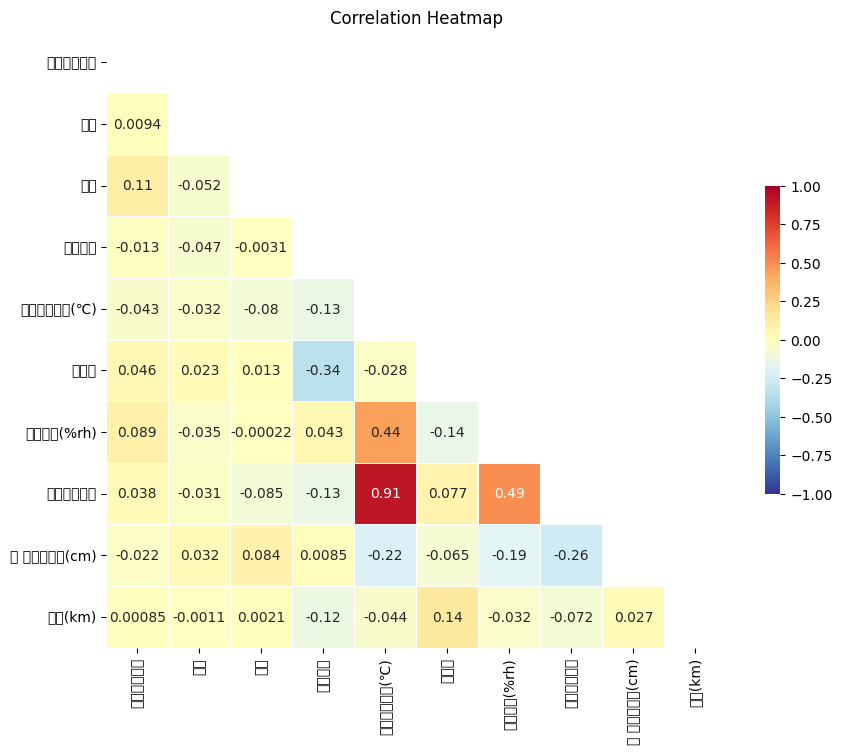

In [63]:
### 상관계수 시각화
# 영화 관객수와 관련 있는 변수 파악

corr = train.corr()

# 그림 사이즈 지정
fig, ax = plt.subplots(figsize = (10,8))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# 하삼각행렬만 시각화(밑에만)
sns.heatmap(corr,
            cmap = 'RdYlBu_r',
            annot = True,   # 실제 값을 표시
            mask = mask,      # 표시하지 않을 마스크 부분을 지정
            linewidths=.5,  # 경계면을 실선으로 구분하기
            cbar_kws={"shrink": .5}, # 컬러바 크기 절반으로 줄이기
            vmin = -1, vmax = 1   # 컬러바 범위: -1 ~ 1(상관계수의 범위)
           )

plt.title('Correlation Heatmap')
plt.show()

###**1-3변수형태 확인**

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358115 entries, 0 to 2102286
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   사고발생일자       358115 non-null  datetime64[ns]
 1   사고발생년도       358115 non-null  int64         
 2   사고발생월도       358115 non-null  object        
 3   지역(시도)       358115 non-null  object        
 4   지역(구군)       358115 non-null  object        
 5   공휴일구분        358115 non-null  object        
 6   주말구분         358115 non-null  object        
 7   요일           358115 non-null  int64         
 8   주차           358115 non-null  int64         
 9   사고건수         358115 non-null  int64         
 10  평균최저기온(℃)    358115 non-null  float64       
 11  일교차          358115 non-null  float64       
 12  평균습도(%rh)    358115 non-null  float64       
 13  평균지면온도       358115 non-null  float64       
 14  일 최심신적설(cm)  100893 non-null  float64       
 15  연장(km)       358115 non-null  flo

In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142717 entries, 0 to 2142716
Data columns (total 15 columns):
 #   Column       Dtype         
---  ------       -----         
 0   사고발생일자       datetime64[ns]
 1   사고발생년도       int64         
 2   사고발생월도       datetime64[ns]
 3   지역(시도)       object        
 4   지역(구군)       object        
 5   공휴일구분        object        
 6   주말구분         object        
 7   요일           int64         
 8   주차           int64         
 9   평균최저기온(℃)    float64       
 10  일교차          float64       
 11  평균습도(%rh)    float64       
 12  평균지면온도       float64       
 13  일 최심신적설(cm)  float64       
 14  연장(km)       float64       
dtypes: datetime64[ns](2), float64(6), int64(3), object(4)
memory usage: 261.6+ MB


###**1-4범주형 변수 Encoding**

In [66]:
from sklearn.preprocessing import LabelEncoder

cat = ['주말구분']

le = LabelEncoder() # 객체 생성
for i in cat:
  le = le.fit(train[i])
  train[i]=le.transform(train[i])

  for label in np.unique(test[i]):
    if label not in le.classes_:
      le.classes_ = np.append(le.classes_, label)
  test[i] = le.transform(test[i])

<ipython-input-66-07331b2c0fe4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i]=le.transform(train[i])


In [67]:
### 주말구분, 공휴일구분 변수 인코딩
# 라벨이 없는 경우 LabelEncoder가 정상적으로 작동하지 않음
# 따라서, 일단 라벨이 있는 데이터에 대해서만 인코딩 진행

le2 = LabelEncoder() # 객체 생성

le2 = le2.fit(train.loc[train['주말구분'].notnull(),'주말구분'])
train.loc[train['주말구분'].notnull(),'주말구분'] = le2.transform(train.loc[train['주말구분'].notnull(),'주말구분'])

<ipython-input-67-f2e0859690eb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[train['주말구분'].notnull(),'주말구분'] = le2.transform(train.loc[train['주말구분'].notnull(),'주말구분'])


In [68]:
from sklearn.preprocessing import LabelEncoder

cat = ['공휴일구분']

le = LabelEncoder() # 객체 생성
for i in cat:
  le = le.fit(train[i])
  train[i]=le.transform(train[i])

  for label in np.unique(test[i]):
    if label not in le.classes_:
      le.classes_ = np.append(le.classes_, label)
  test[i] = le.transform(test[i])

<ipython-input-68-41cb98af79d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i]=le.transform(train[i])


In [69]:
e2 = LabelEncoder() # 객체 생성

le2 = le2.fit(train.loc[train['공휴일구분'].notnull(),'공휴일구분'])
train.loc[train['공휴일구분'].notnull(),'공휴일구분'] = le2.transform(train.loc[train['공휴일구분'].notnull(),'공휴일구분'])

<ipython-input-69-75ed42f567dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[train['공휴일구분'].notnull(),'공휴일구분'] = le2.transform(train.loc[train['공휴일구분'].notnull(),'공휴일구분'])


In [70]:
train

,사고발생일자,사고발생년도,사고발생월도,지역(시도),지역(구군),공휴일구분,주말구분,요일,주차,사고건수,평균최저기온(℃),일교차,평균습도(%rh),평균지면온도,일 최심신적설(cm),연장(km)
0,2017-01-01,2017,01,전남,무안군,1,1,7,1,22,-0.30,11.6,81.00,3.946154,NaN,3.00
1,2017-01-01,2017,01,전남,무안군,1,1,7,1,22,-0.30,11.6,81.00,3.946154,NaN,17.00
2,2017-01-01,2017,01,전남,무안군,1,1,7,1,22,-0.30,11.6,81.00,3.946154,NaN,2.00
3,2017-01-01,2017,01,전남,무안군,1,1,7,1,22,-0.30,11.6,81.00,3.946154,NaN,10.65
4,2017-01-01,2017,01,전남,무안군,1,1,7,1,22,-0.30,11.6,81.00,3.946154,NaN,3.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102282,2022-12-31,2022,12,경기,성남시,1,1,6,5,127,-9.74,0.8,79.84,-1.440000,NaN,2.00
2102283,2022-12-31,2022,12,경기,성남시,1,1,6,5,127,-9.74,0.8,79.84,-1.440000,NaN,7.00
2102284,2022-12-31,2022,12,경기,성남시,1,1,6,5,127,-9.74,0.8,79.84,-1.440000,NaN,8.00
2102285,2022-12-31,2022,12,경기,성남시,1,1,6,5,127,-9.74,0.8,79.84,-1.440000,NaN,2.00


In [71]:
train = train.dropna(subset=['일 최심신적설(cm)'])

In [72]:
train

,사고발생일자,사고발생년도,사고발생월도,지역(시도),지역(구군),공휴일구분,주말구분,요일,주차,사고건수,평균최저기온(℃),일교차,평균습도(%rh),평균지면온도,일 최심신적설(cm),연장(km)
3795,2017-01-05,2017,01,경북,상주시,0,0,4,1,2,-1.1,9.000000,79.000000,2.342857,0.0,4.10
3796,2017-01-05,2017,01,경북,상주시,0,0,4,1,2,-1.1,9.000000,79.000000,2.342857,0.0,11.50
3797,2017-01-05,2017,01,경북,상주시,0,0,4,1,2,-1.1,9.000000,79.000000,2.342857,0.0,16.02
3798,2017-01-05,2017,01,경북,상주시,0,0,4,1,2,-1.1,9.000000,79.000000,2.342857,0.0,3.14
3799,2017-01-05,2017,01,경북,상주시,0,0,4,1,2,-1.1,9.000000,79.000000,2.342857,0.0,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102271,2022-12-31,2022,12,강원,고성군,1,1,6,5,13,-9.2,10.266667,65.333333,-1.516667,0.0,8.00
2102272,2022-12-31,2022,12,강원,고성군,1,1,6,5,13,-9.2,10.266667,65.333333,-1.516667,0.0,5.20
2102273,2022-12-31,2022,12,강원,고성군,1,1,6,5,13,-9.2,10.266667,65.333333,-1.516667,0.0,2.00
2102274,2022-12-31,2022,12,강원,고성군,1,1,6,5,13,-9.2,10.266667,65.333333,-1.516667,0.0,20.77


In [85]:
train['일 최심신적설(cm)'] = train['일 최심신적설(cm)'].replace({0.0: 1})

print(train)

            사고발생일자  사고발생년도 사고발생월도 지역(시도) 지역(구군)  공휴일구분  주말구분  요일  주차  사고건수  \
3795    2017-01-05    2017     01     경북    상주시      0     0   4   1     2   
3796    2017-01-05    2017     01     경북    상주시      0     0   4   1     2   
3797    2017-01-05    2017     01     경북    상주시      0     0   4   1     2   
3798    2017-01-05    2017     01     경북    상주시      0     0   4   1     2   
3799    2017-01-05    2017     01     경북    상주시      0     0   4   1     2   
...            ...     ...    ...    ...    ...    ...   ...  ..  ..   ...   
2102271 2022-12-31    2022     12     강원    고성군      1     1   6   5    13   
2102272 2022-12-31    2022     12     강원    고성군      1     1   6   5    13   
2102273 2022-12-31    2022     12     강원    고성군      1     1   6   5    13   
2102274 2022-12-31    2022     12     강원    고성군      1     1   6   5    13   
2102275 2022-12-31    2022     12     강원    고성군      1     1   6   5    13   

         평균최저기온(℃)        일교차  평균습도(%rh)    평균지면온도  일 최심신적설(cm)

<ipython-input-85-9e3adf252bb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['일 최심신적설(cm)'] = train['일 최심신적설(cm)'].replace({0.0: 1})


In [82]:
has_other =! '1' in train['일 최심신적설(cm)'].values

if has_other:
    print("1이 아닌 값이 존재하지 않습니다")
else:
    print("1이 아닌 값이 존재합니다.")

1이 아닌 값이 존재하지 않습니다


<ipython-input-83-58cdac387cd8>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()
<ipython-input-83-58cdac387cd8>:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missin

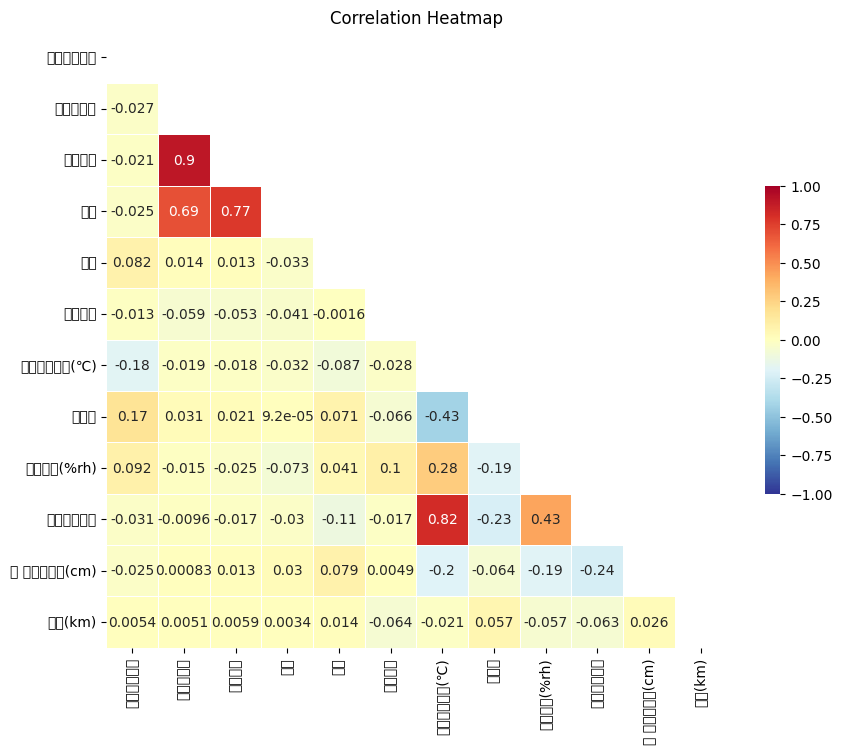

In [83]:
### 상관계수 시각화
# 영화 관객수와 관련 있는 변수 파악

corr = train.corr()

# 그림 사이즈 지정
fig, ax = plt.subplots(figsize = (10,8))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# 하삼각행렬만 시각화(밑에만)
sns.heatmap(corr,
            cmap = 'RdYlBu_r',
            annot = True,   # 실제 값을 표시
            mask = mask,      # 표시하지 않을 마스크 부분을 지정
            linewidths=.5,  # 경계면을 실선으로 구분하기
            cbar_kws={"shrink": .5}, # 컬러바 크기 절반으로 줄이기
            vmin = -1, vmax = 1   # 컬러바 범위: -1 ~ 1(상관계수의 범위)
           )

plt.title('Correlation Heatmap')
plt.show()

###**전처리 파일 저장**


In [86]:
train.to_excel("train_total.xlsx",index=False)

In [87]:
test=train.drop(['사고건수'],axis=1)

In [88]:
test.to_excel("test_total.xlsx",index=False)